# Análise Exploratória
## Pré-processamento

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np

In [2]:
df = pd.read_csv("marketing_campaign.csv", delimiter="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
#transformações dos dados

#drop colunas inuteis
df = df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])

#drop NaN
df = df.dropna()

#criando coluna total gasto
df["TotalSpent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#criando coluna de idade útil
df["Age"] = (2024-df["Year_Birth"])
df = df.drop("Year_Birth", axis = 1)

#formatando coluna de data de cadastro do cliente pra quantidade de dias que faz que ele é cliente
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)
df['Dt_Customer'] = (pd.to_datetime('now') - df['Dt_Customer']).dt.days

#coluna tratando a info de pessoal vivendo sozinha ou com parceirx
df["HasPartner"] = df["Marital_Status"].replace({"Married":2, "Together":2, "Absurd":1, "Widow":1, "YOLO":1, "Divorced":1, "Single":1, "Alone": 1})

#coluna somando os pirralhos
df["Children"]=df["Kidhome"]+df["Teenhome"]

#coluna total de pessoas em casa
df["FamilySize"] = df["HasPartner"] + df["Children"]

#drop essa que nao importa mais
df = df.drop('Marital_Status', axis = 1)

#tratando dados formação escolar
df["Education"]=df["Education"].replace({"Basic":1,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":3})

In [6]:
df.describe()

,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpent,Age,HasPartner,Children,FamilySize
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.267148,52247.251354,0.441787,0.505415,4003.521209,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073105,0.064079,0.013538,0.009477,0.150271,607.075361,55.179603,1.645307,0.947202,2.592509
std,0.652084,25173.076661,0.536896,0.544181,202.434667,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.260367,0.244950,0.115588,0.096907,0.357417,602.900476,11.985554,0.478528,0.749062,0.905722
min,1.000000,1730.000000,0.000000,0.000000,3650.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,28.000000,1.000000,0.000000,1.000000
25%,2.000000,35303.000000,0.000000,0.000000,3830.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,47.000000,1.000000,0.000000,2.000000
50%,2.000000,51381.500000,0.000000,0.000000,4005.500000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,396.500000,54.000000,2.000000,1.000000,3.000000
75%,3.000000,68522.000000,1.000000,1.000000,4179.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1048.000000,65.000000,2.000000,1.000000,3.000000
max,3.000000,666666.000000,2.000000,2.000000,4349.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,131.000000,2.000000,3.000000,5.000000


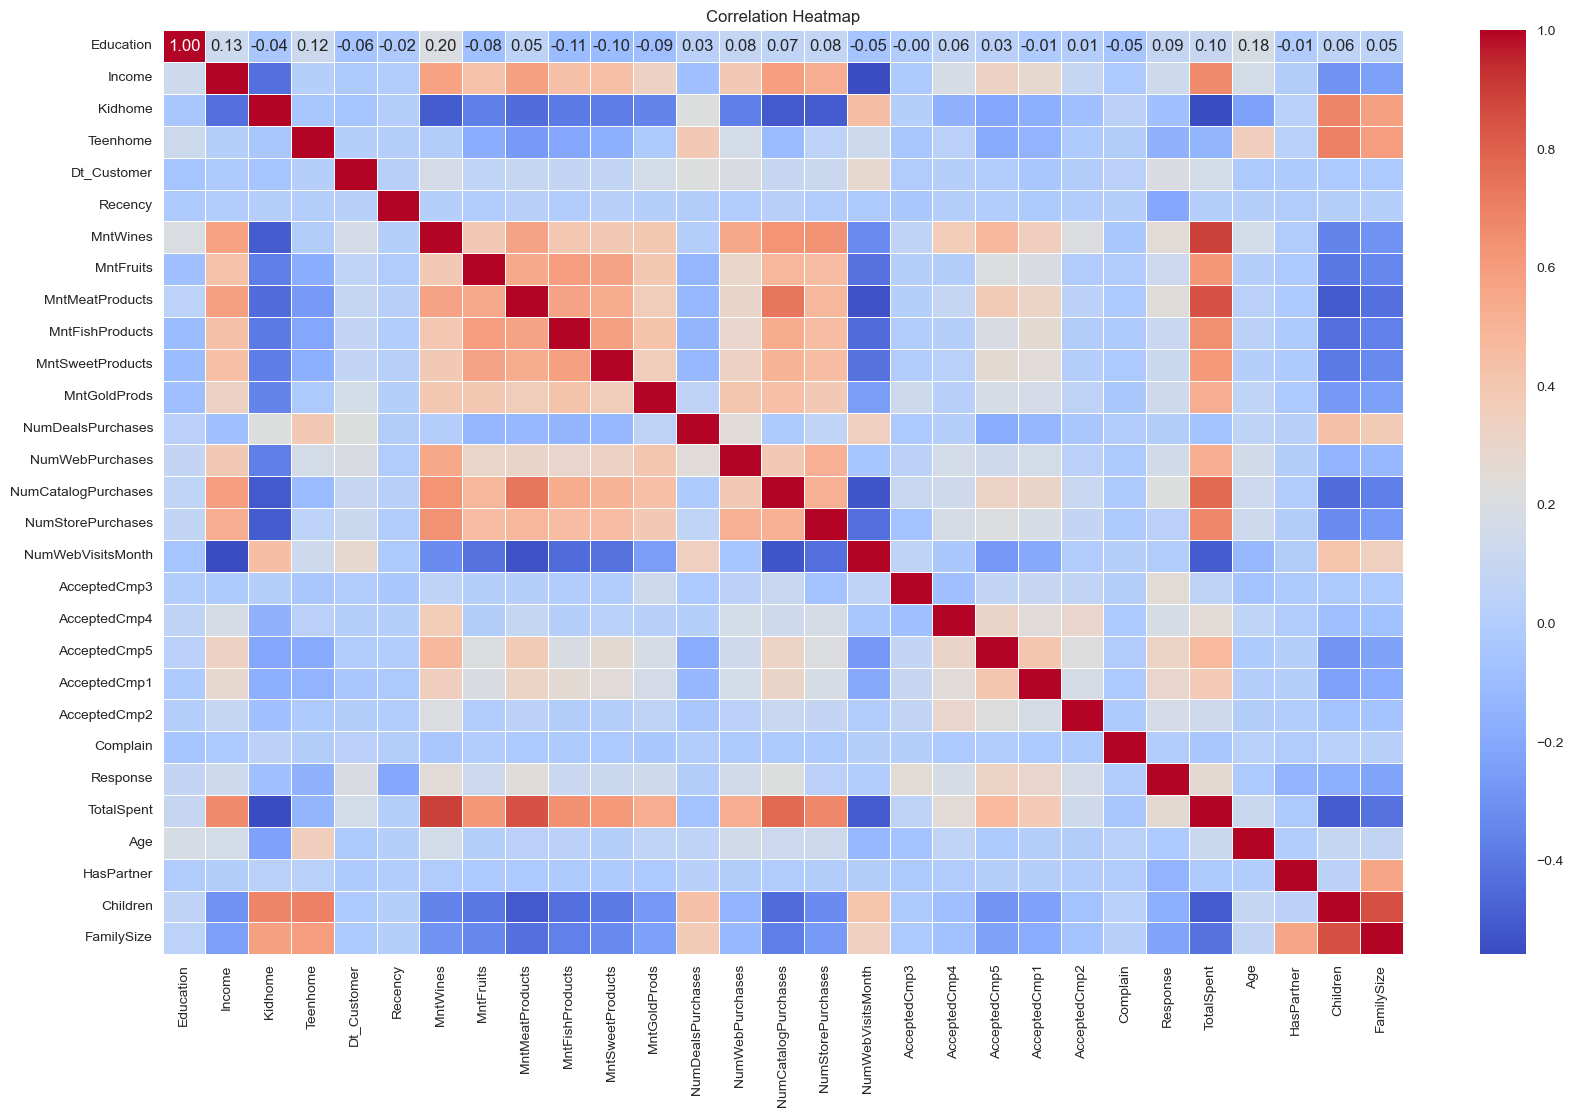

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

plt.show()

In [8]:
#vamo dropa essas queridas
cols_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

to_drop = df.copy()

df = to_drop.drop(cols_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Dt_Customer          2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   int64 

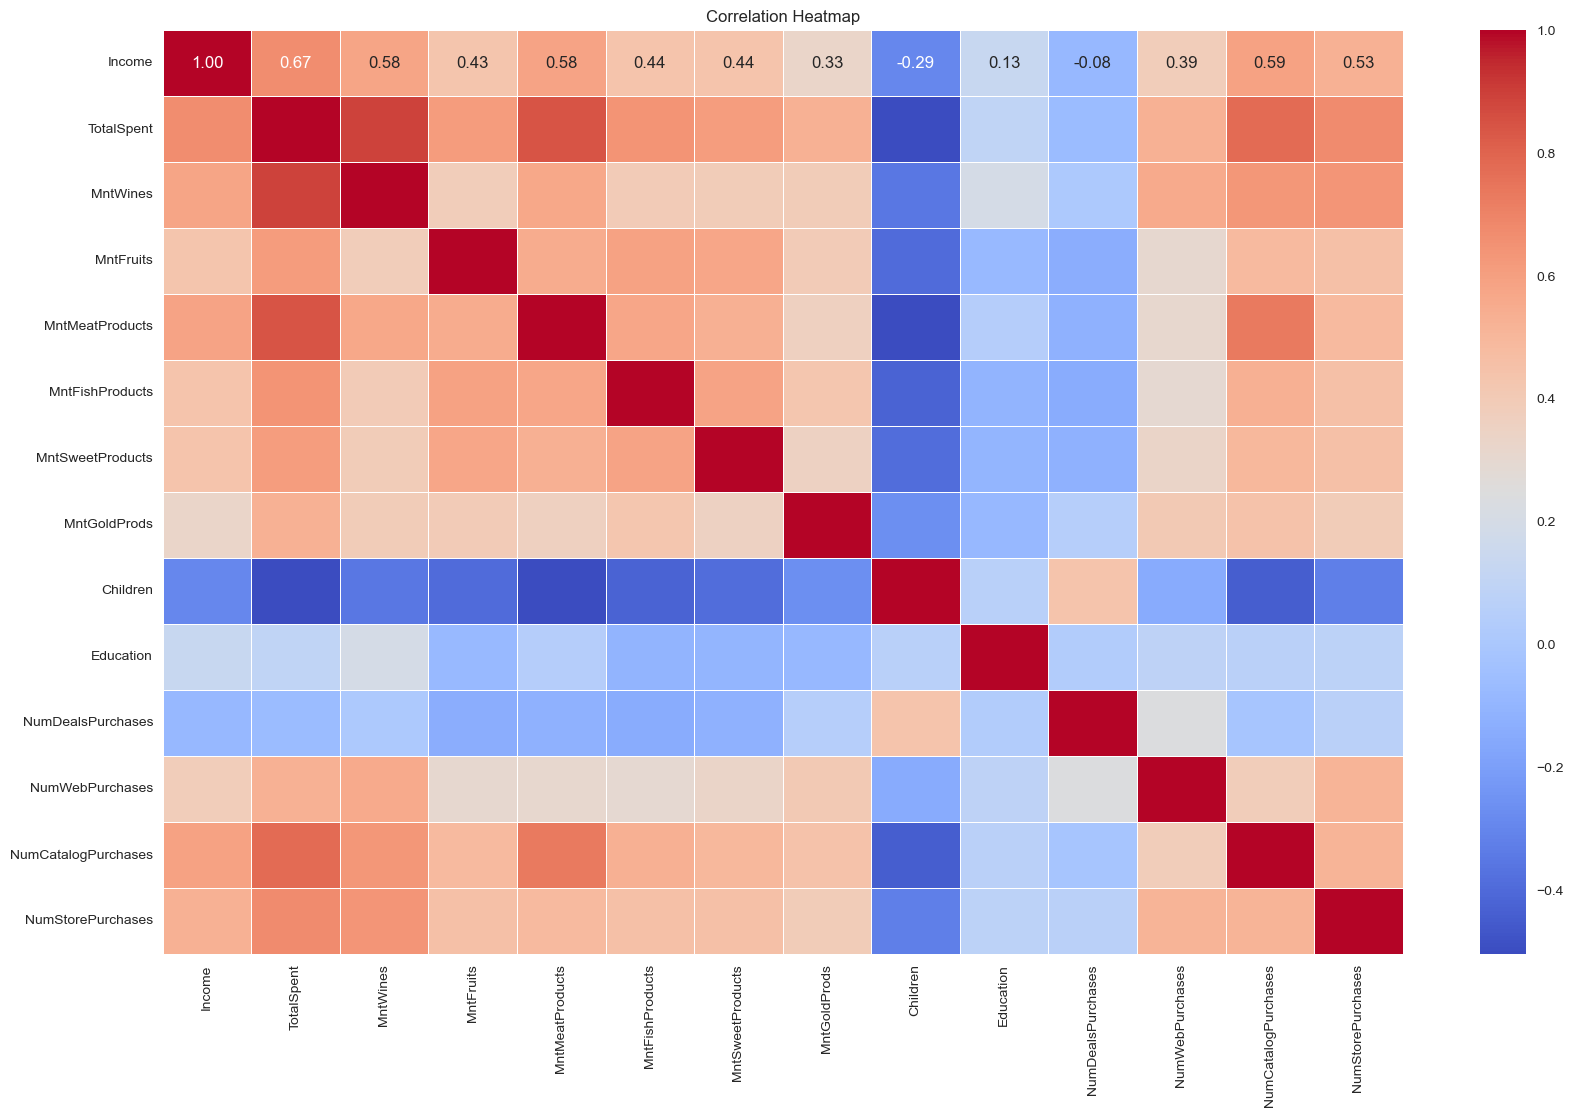

In [9]:
correlation_matrix = df[['Income', 'TotalSpent', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Children','Education','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].corr()
 
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

plt.show()

In [10]:
correlation_matrix

,Income,TotalSpent,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Children,Education,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Income,1.000000,0.667576,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.293352,0.131115,-0.083101,0.387878,0.589162,0.529362
TotalSpent,0.667576,1.000000,0.893136,0.613249,0.845884,0.642371,0.607062,0.528708,-0.500244,0.097935,-0.065854,0.528973,0.780482,0.675181
MntWines,0.578650,0.893136,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,-0.353748,0.197522,0.008886,0.553786,0.634753,0.640012
MntFruits,0.430842,0.613249,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.395901,-0.079732,-0.134512,0.302039,0.486263,0.458491
MntMeatProducts,0.584633,0.845884,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.504545,0.045114,-0.121308,0.307090,0.734127,0.486006
MntFishProducts,0.438871,0.642371,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.427841,-0.106060,-0.143241,0.299688,0.532757,0.457745
MntSweetProducts,0.440744,0.607062,0.390326,0.571606,0.535136,0.583867,1.000000,0.357450,-0.389411,-0.104818,-0.121432,0.333937,0.495136,0.455225
MntGoldProds,0.325916,0.528708,0.392731,0.396487,0.359446,0.427142,0.357450,1.000000,-0.268918,-0.085267,0.051905,0.407066,0.442428,0.389180
Children,-0.293352,-0.500244,-0.353748,-0.395901,-0.504545,-0.427841,-0.389411,-0.268918,1.000000,0.060315,0.436076,-0.148871,-0.443474,-0.323213
Education,0.131115,0.097935,0.197522,-0.079732,0.045114,-0.106060,-0.104818,-0.085267,0.060315,1.000000,0.034354,0.083737,0.068070,0.078762


In [11]:
#normalizando os dados
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns = df.columns)
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpent,Age,HasPartner,Children,FamilySize
0,-0.409776,0.234063,-0.823039,-0.928972,1.529129,0.310532,0.978226,1.549429,1.690227,2.454568,...,0.351713,1.428553,2.504712,-0.554143,0.693232,1.675488,0.986443,-1.348829,-1.264803,-1.758673
1,-0.409776,-0.234559,1.039938,0.909066,-1.188411,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,...,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.962358,1.236801,-1.348829,1.405806,0.450009
2,-0.409776,0.769478,-0.823039,-0.928972,-0.205155,-0.795134,0.358511,0.569159,-0.178368,1.340203,...,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.280250,0.318822,0.741384,-1.264803,-0.654332
3,-0.409776,-1.017239,1.039938,-0.928972,-1.059945,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,...,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.919224,-1.266777,0.741384,0.070501,0.450009
4,1.124115,0.240221,1.039938,-0.928972,-0.951244,1.554407,-0.391671,0.418348,-0.218505,0.152766,...,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.307044,-1.016420,0.741384,0.070501,0.450009


In [12]:
pca = PCA(n_components=4)
pca.fit(scaled_df)
PCA_use = pd.DataFrame(pca.transform(scaled_df), columns=(["PCA1","PCA2","PCA3","PCA4"]))
PCA_use.head()

,PCA1,PCA2,PCA3,PCA4
0,4.739475,-0.294211,2.324084,0.944243
1,-2.852376,-0.016908,-1.530487,0.456383
2,2.205728,-0.611162,-0.135745,-0.140902
3,-2.593748,-1.529680,-0.016897,-1.149256
4,-0.512526,0.205997,-0.062927,-1.069119


In [13]:
PCA_use.describe().T

,count,mean,std,min,25%,50%,75%,max
PCA1,2216.0,-2.565136e-17,2.768308,-5.775448,-2.452952,-0.730133,2.395846,7.272709
PCA2,2216.0,5.771557e-17,1.638733,-3.829833,-1.283443,-0.163160,1.168848,6.464139
PCA3,2216.0,-5.931878e-17,1.249951,-4.490610,-0.825171,-0.013555,0.836940,6.068209
PCA4,2216.0,1.603210e-17,1.180564,-3.313056,-0.828381,-0.070941,0.818434,3.463177


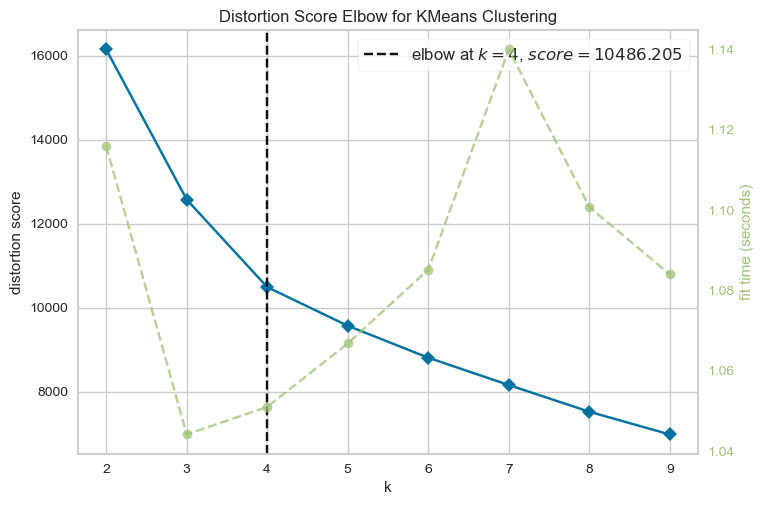

numero otimo de clusters fonte vozes do cotovelo: 4


In [14]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(PCA_use)
visualizer.show()

print("numero otimo de clusters fonte vozes do cotovelo:", visualizer.elbow_value_)

In [1]:
np.random.seed(42)

kmeans = KMeans(n_clusters=visualizer.elbow_value_)
kmeans.fit(PCA_use)

NameError: name 'np' is not defined

In [16]:
df['Cluster'] = kmeans.labels_
cluster_counts = df['Cluster'].value_counts()
cluster_counts

Cluster
1    635
0    547
3    534
2    500
Name: count, dtype: int64

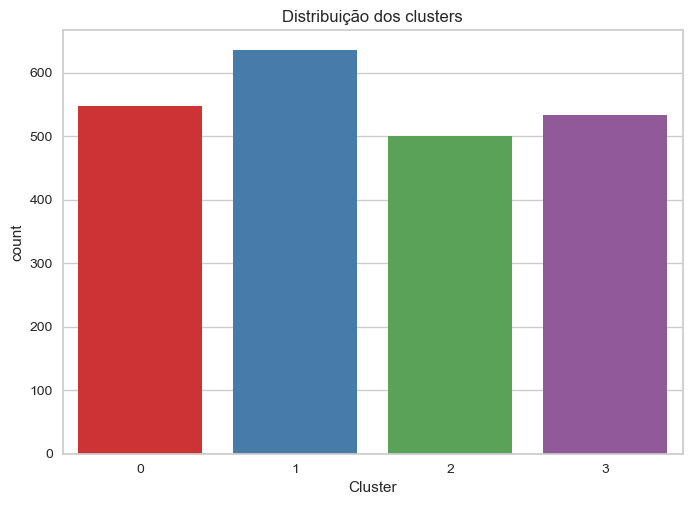

In [17]:
custom_colors = sns.color_palette('Set1', 4)

pl = sns.countplot(x=df["Cluster"], palette= custom_colors)
pl.set_title("Distribuição dos clusters")
plt.show()

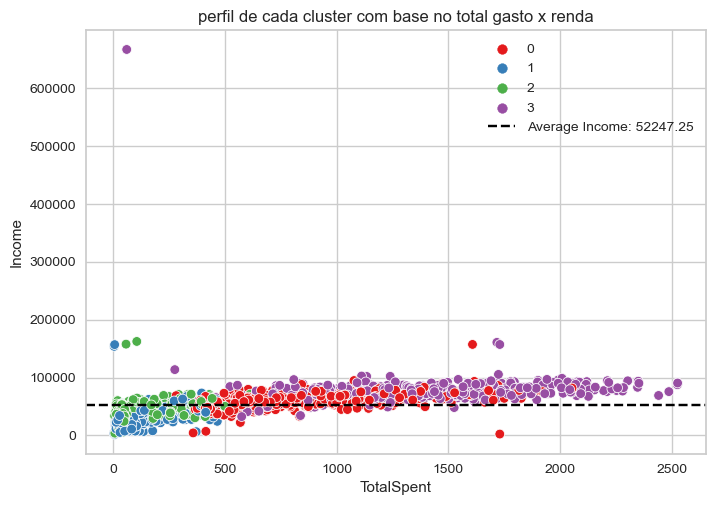

In [18]:
average_income = df['Income'].mean()
custom_colors = sns.color_palette('Set1', 4)

pal = sns.color_palette('viridis', df['Cluster'].nunique())
pl = sns.scatterplot(data=df, x='TotalSpent', y='Income', hue='Cluster', palette=custom_colors)
pl.set_title("perfil de cada cluster com base no total gasto x renda")

plt.axhline(y=average_income, color='black', linestyle='--', label=f'Average Income: {average_income:.2f}')
plt.legend()
plt.show()

In [19]:
#vamo trata essa porcaria de outlier, acho que devia ter feito isso mais pra cima
q = df["Income"].quantile(0.99)
df[df["Income"] < q]

,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpent,Age,HasPartner,Children,FamilySize,Cluster
0,2,58138.0,0,0,4313,58,635,88,546,172,...,8,10,4,7,1617,67,1,0,1,3
1,2,46344.0,1,1,3763,38,11,1,6,2,...,1,1,2,5,27,70,1,2,3,2
2,2,71613.0,0,0,3962,26,426,49,127,111,...,8,2,10,4,776,59,2,0,2,3
3,2,26646.0,1,0,3789,26,11,4,20,10,...,2,0,4,6,53,40,2,1,3,1
4,3,58293.0,1,0,3811,94,173,43,118,46,...,5,3,6,5,422,43,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223.0,0,1,4031,46,709,43,182,42,...,9,3,4,5,1341,57,2,1,3,0
2236,3,64014.0,2,1,3669,56,406,0,30,0,...,8,2,5,7,444,78,2,3,5,2
2237,2,56981.0,0,0,3805,91,908,48,217,32,...,2,3,13,6,1241,43,1,0,1,3
2238,3,69245.0,0,1,3806,8,428,30,214,80,...,6,5,10,3,843,68,2,1,3,0


In [20]:
q_low = df["Income"].quantile(0.01)
q_hi  = df["Income"].quantile(0.99)

df_filtered = df[(df["Income"] < q_hi) & (df["Income"] > q_low)]

In [21]:
df_filtered

,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpent,Age,HasPartner,Children,FamilySize,Cluster
0,2,58138.0,0,0,4313,58,635,88,546,172,...,8,10,4,7,1617,67,1,0,1,3
1,2,46344.0,1,1,3763,38,11,1,6,2,...,1,1,2,5,27,70,1,2,3,2
2,2,71613.0,0,0,3962,26,426,49,127,111,...,8,2,10,4,776,59,2,0,2,3
3,2,26646.0,1,0,3789,26,11,4,20,10,...,2,0,4,6,53,40,2,1,3,1
4,3,58293.0,1,0,3811,94,173,43,118,46,...,5,3,6,5,422,43,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223.0,0,1,4031,46,709,43,182,42,...,9,3,4,5,1341,57,2,1,3,0
2236,3,64014.0,2,1,3669,56,406,0,30,0,...,8,2,5,7,444,78,2,3,5,2
2237,2,56981.0,0,0,3805,91,908,48,217,32,...,2,3,13,6,1241,43,1,0,1,3
2238,3,69245.0,0,1,3806,8,428,30,214,80,...,6,5,10,3,843,68,2,1,3,0


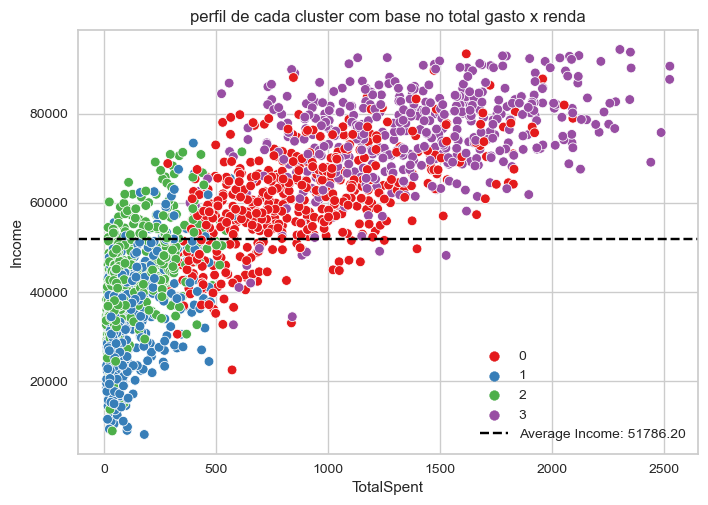

In [22]:
average_income = df_filtered['Income'].mean()
custom_colors = sns.color_palette('Set1', 4)

pal = sns.color_palette('viridis', df_filtered['Cluster'].nunique())
pl = sns.scatterplot(data=df_filtered, x='TotalSpent', y='Income', hue='Cluster', palette=custom_colors)
pl.set_title("perfil de cada cluster com base no total gasto x renda")
plt.axhline(y=average_income, color='black', linestyle='--', label=f'Average Income: {average_income:.2f}')
plt.legend()
plt.show()

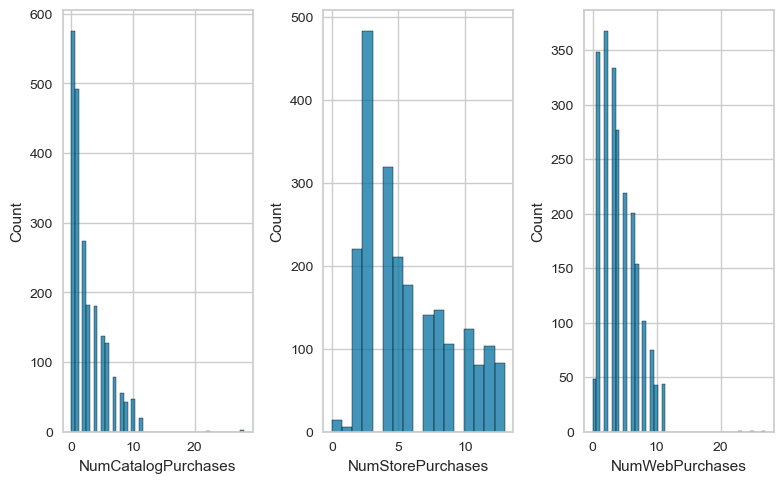

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
sns.histplot(df["NumCatalogPurchases"], ax=axes[0]) 
sns.histplot(df["NumStorePurchases"], ax=axes[1])
sns.histplot(df["NumWebPurchases"], ax=axes[2])
fig.tight_layout()

In [24]:
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Income': 'mean',
    'TotalSpent': 'mean',
    'MntGoldProds': 'mean',
    'MntWines': 'mean',
    'NumCatalogPurchases': 'mean',
    'NumStorePurchases': 'mean',
    'NumWebPurchases': 'mean'
}).reset_index()

cluster_summary

,Cluster,Age,Income,TotalSpent,MntGoldProds,MntWines,NumCatalogPurchases,NumStorePurchases,NumWebPurchases
0,0,59.170018,60400.930530,862.892139,68.310786,530.592322,3.647166,8.129799,6.638026
1,1,48.017323,31315.486614,106.357480,18.420472,37.307087,0.560630,3.233071,2.215748
2,2,59.570000,43122.644000,144.800000,15.254000,85.974000,0.792000,3.718000,2.654000
3,3,55.498127,77329.483146,1373.295880,76.286517,597.700375,5.940075,8.419476,5.033708


In [25]:
# num sei mais o que to fazendo, odeio mkt
#
# acho que a gente pode dizer que o perfil do cliente do cluster 3 ganha melhor, 
# gasta pouco considerando o que ganha, 
# compra mais produtos premium e vinho em relação aos outros (o que faz sentido)
# e prefere fazer as compras pela loja física (??????)

# no geral todos os clientes compram mais pela loja física, e se vc for considerar a média de idade das pessoas faz sentido (?)

# galera dos cluster 1 e 2 tá mais na merda ali pela renda, gastando pouco coitada
# perfil do cluster 0 é mais parecido com o 3

# clientes que gastam mais na loja, principalmente em produtos mais premium, poderiam ser prestigiados, programa de fidelidade ou de reconhecimento 
# ou algo nesse sentido pra eles se sentirem importantes e seguirem com esse perfil de compra

# clientes que gastam menos na loja, principalmente porque têm uma renda mais baixa, 
# poderiam receber mais infos de promoção e/ou programa de pontos, facilidade para parcelamentos etc (?)

# proximo trabalho a gente vai fazer sobre taylor swift